In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [5]:
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'),
                                                    (0.85 / vmax, 'lightskyblue'),
                                                    (0.850001 / vmax, 'bisque'),
                                                    (1 / vmax, 'bisque')]
                                        )

In [6]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'darkmagenta'), #colour for 1/6
                                                    (0.75 / vmax, 'darkmagenta'),
                                                    (0.750001 / vmax, 'darkorange'), #colour for 5/6
                                                    (1 / vmax, 'darkorange')]
                                        )

In [7]:
pink_patch = mpatches.Patch(color='darkmagenta', label='1/2 runs')
orange_patch = mpatches.Patch(color='darkorange', label='2/2 runs')

In [8]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [9]:
geo_tools.find_closest_model_point(-122.86, 48.38, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(99, 159)

In [10]:
geo_tools.find_closest_model_point(-122.86, 48.38, X, Y)

(256, 267)

In [11]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [12]:
time_slice1 = slice('2016-12-29 00:00:00', '2017-01-05 00:00:00')
time_slice2 = slice('2018-10-16 00:00:00', '2018-10-23 00:00:00')
time_slice3 = slice('2016-06-29 00:00:00', '2016-07-06 00:00:00')
time_slice4 = slice('2018-08-05 00:00:00', '2018-08-12 00:00:00')

In [13]:
Yind = 99
Xind = 159

u_winds1 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice1).data
v_winds1 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice1).data

u_winds2 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice2).data
v_winds2 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice2).data

u_winds3 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice3).data
v_winds3 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice3).data

u_winds4 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice4).data
v_winds4 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice4).data

In [14]:
wind_speed1, wind_dir1 = wind_tools.wind_speed_dir(u_winds1, v_winds1)
wind_speed2, wind_dir2 = wind_tools.wind_speed_dir(u_winds2, v_winds2)
wind_speed3, wind_dir3 = wind_tools.wind_speed_dir(u_winds3, v_winds3)
wind_speed4, wind_dir4 = wind_tools.wind_speed_dir(u_winds4, v_winds4)

In [15]:
high350 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_26dec16.nc')
low350 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_13oct18.nc')
low150 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_26jun16.nc')
high150 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SB/Lagrangian_AKNS_crude_fakewinds_SB_02aug18.nc')

/data/vdo/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:125: UserWarning: No contour levels were found within the data range.
  [isobath], colors=color, zorder=zorder)


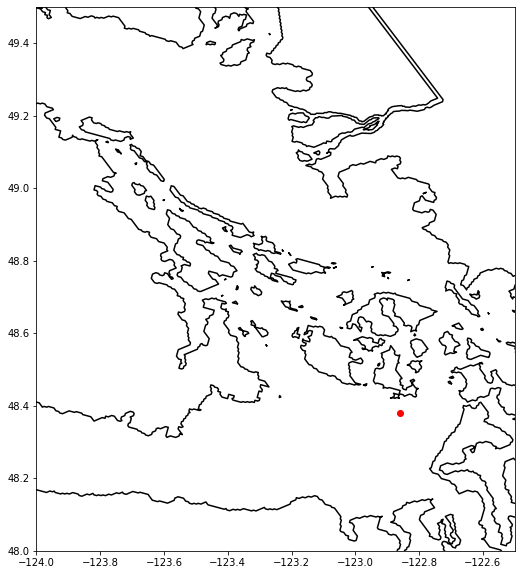

In [16]:
fig, ax = plt.subplots(figsize = (10,10))

ax.plot(-122.86, 48.38, 'ro')
ax.set_ylim(48, 49.5)
ax.set_xlim(-124, -122.5)
viz_tools.plot_coastline(ax, grid, coords = 'map')
viz_tools.set_aspect(ax, coords = 'map');

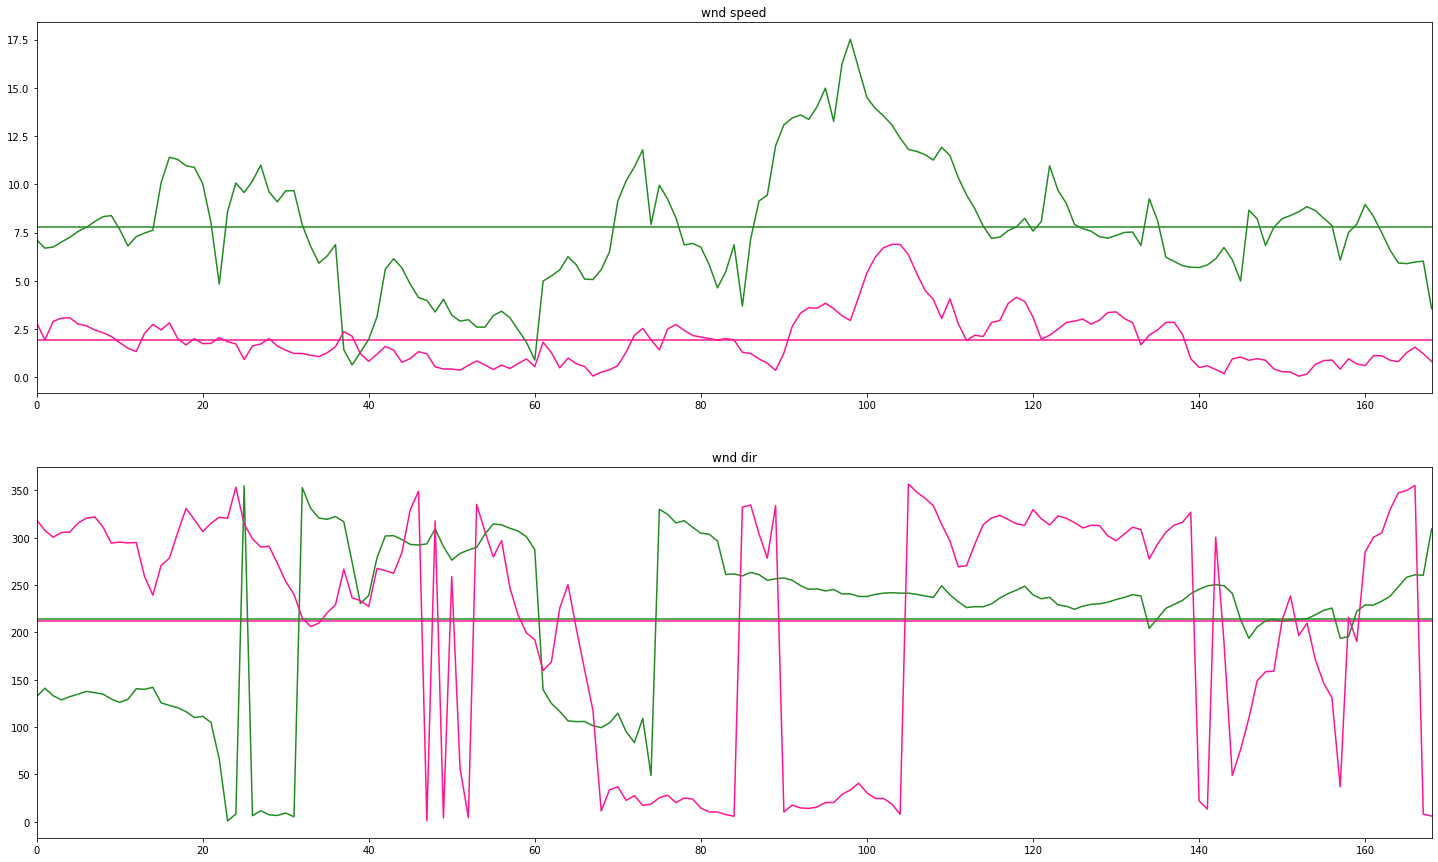

In [17]:
fig, ax = plt.subplots(2,1, figsize = (25,15))

ax[0].plot(wind_speed1, color = 'forestgreen')
ax[0].plot(wind_speed2, color = 'deeppink')
ax[0].set_title('wnd speed')
ax[0].hlines(wind_speed1.mean(), 0, 168, color = 'forestgreen')
ax[0].hlines(wind_speed2.mean(), 0, 168, color = 'deeppink')

ax[1].plot(wind_dir1, color = 'forestgreen')
ax[1].plot(wind_dir2, color = 'deeppink')
ax[1].set_title('wnd dir')
ax[1].hlines(wind_dir1.mean(), 0, 168, color = 'forestgreen')
ax[1].hlines(wind_dir2.mean(), 0, 168, color = 'deeppink')

for a in ax:
    a.set_xlim(0, 168);

In [18]:
f0 = high350
f1 = low350

f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0


problessthanone = (f0lessthanone+f1lessthanone)/2

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0


problessthanthree = (f0lessthanthree+f1lessthanthree)/2

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven)/2

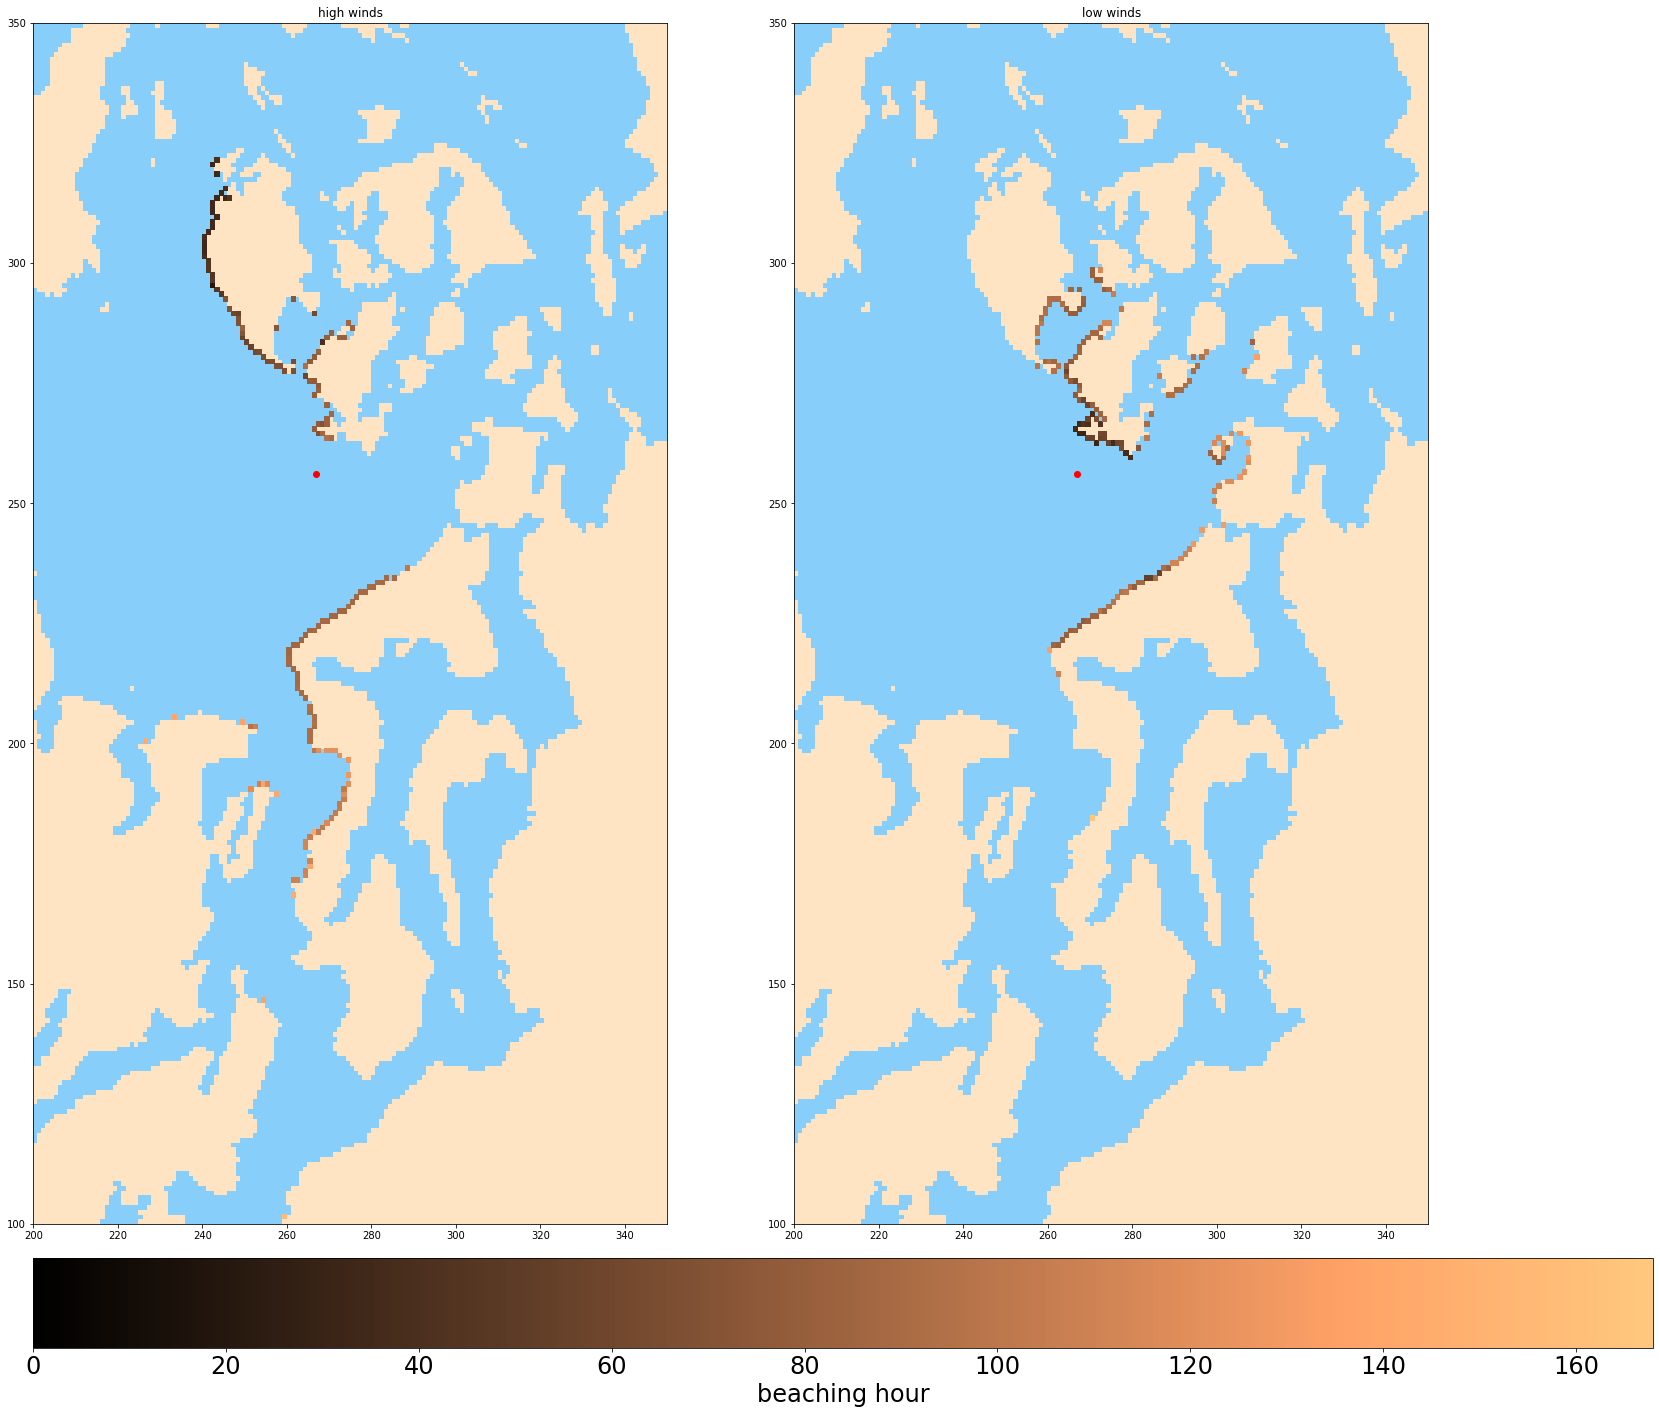

In [20]:
fig, ax = plt.subplots(1,2, figsize = (25,25))
for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("high winds")
ax[1].set_title("low winds")
ax[0].pcolormesh(np.ma.masked_equal(high350['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[1].pcolormesh(np.ma.masked_equal(low350['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
for a in ax:
    a.plot(267,256, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(100, 350)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.1, p1[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=24) 
cbar.set_label('beaching hour', fontsize = 24);

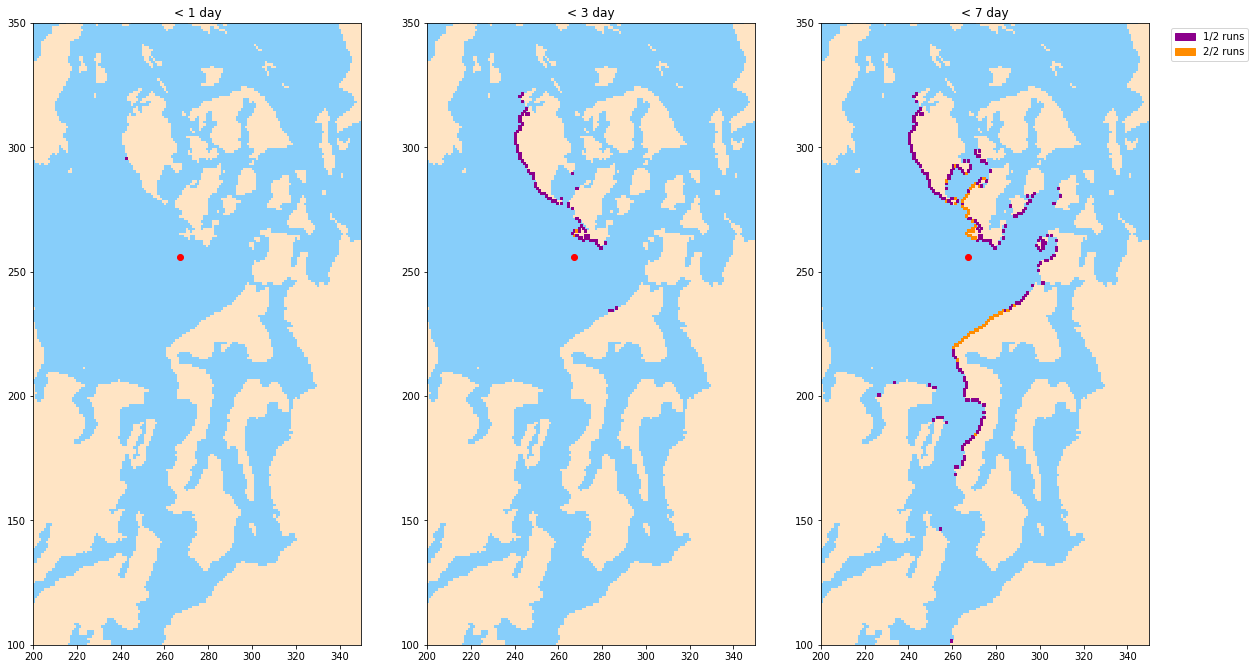

In [21]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, orange_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    a.plot(267,256, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(100, 350);

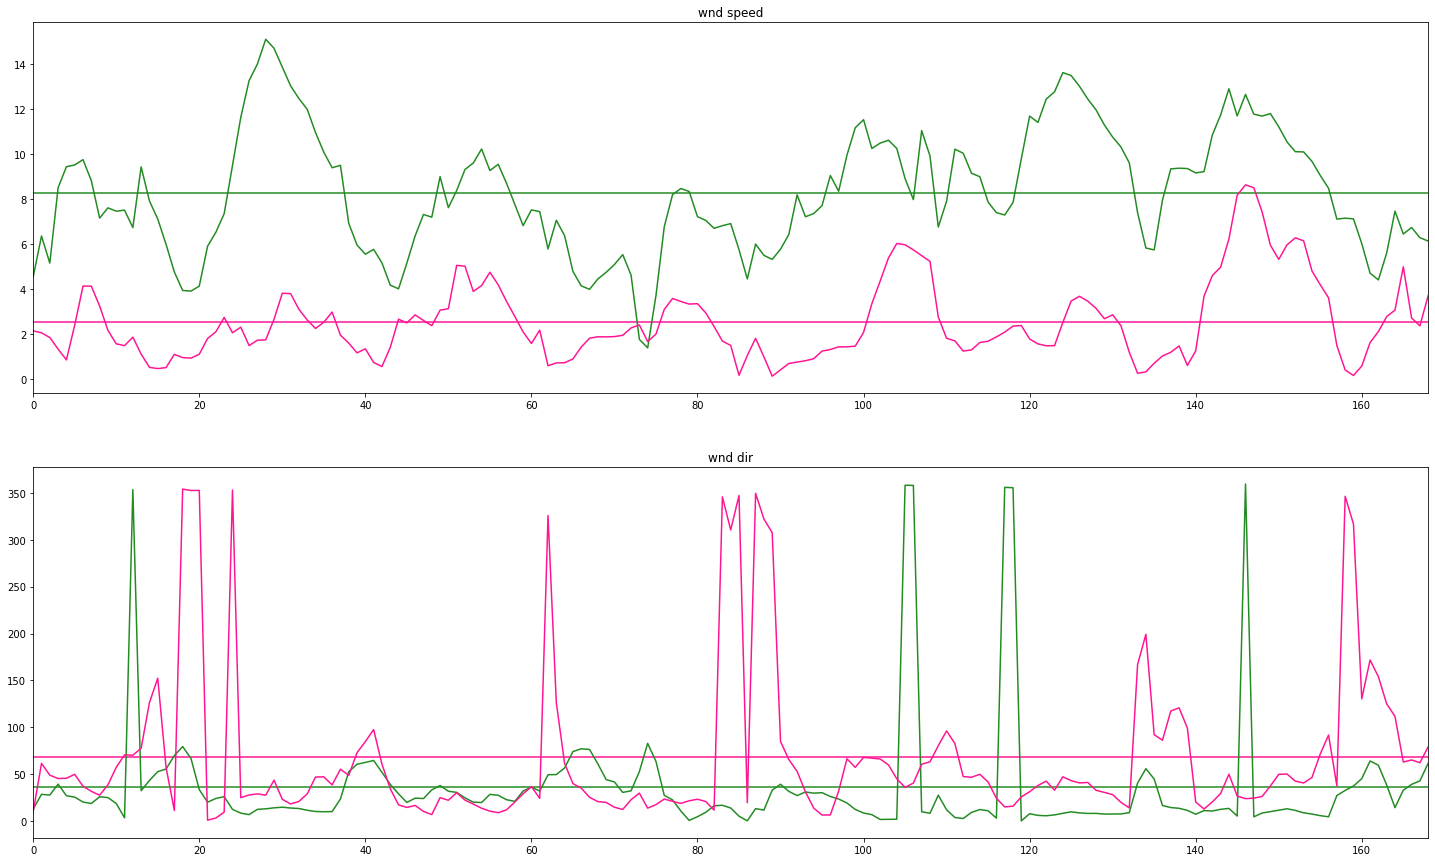

In [22]:
fig, ax = plt.subplots(2,1, figsize = (25,15))

ax[0].plot(wind_speed3, color = 'forestgreen')
ax[0].plot(wind_speed4, color = 'deeppink')
ax[0].set_title('wnd speed')
ax[0].hlines(wind_speed3.mean(), 0, 168, color = 'forestgreen')
ax[0].hlines(wind_speed4.mean(), 0, 168, color = 'deeppink')

ax[1].plot(wind_dir3, color = 'forestgreen')
ax[1].plot(wind_dir4, color = 'deeppink')
ax[1].set_title('wnd dir')
ax[1].hlines(wind_dir3.mean(), 0, 168, color = 'forestgreen')
ax[1].hlines(wind_dir4.mean(), 0, 168, color = 'deeppink')

for a in ax:
    a.set_xlim(0, 168);

In [23]:
f0 = high150
f1 = low150

f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0


problessthanone = (f0lessthanone+f1lessthanone)/2

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0


problessthanthree = (f0lessthanthree+f1lessthanthree)/2

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven)/2

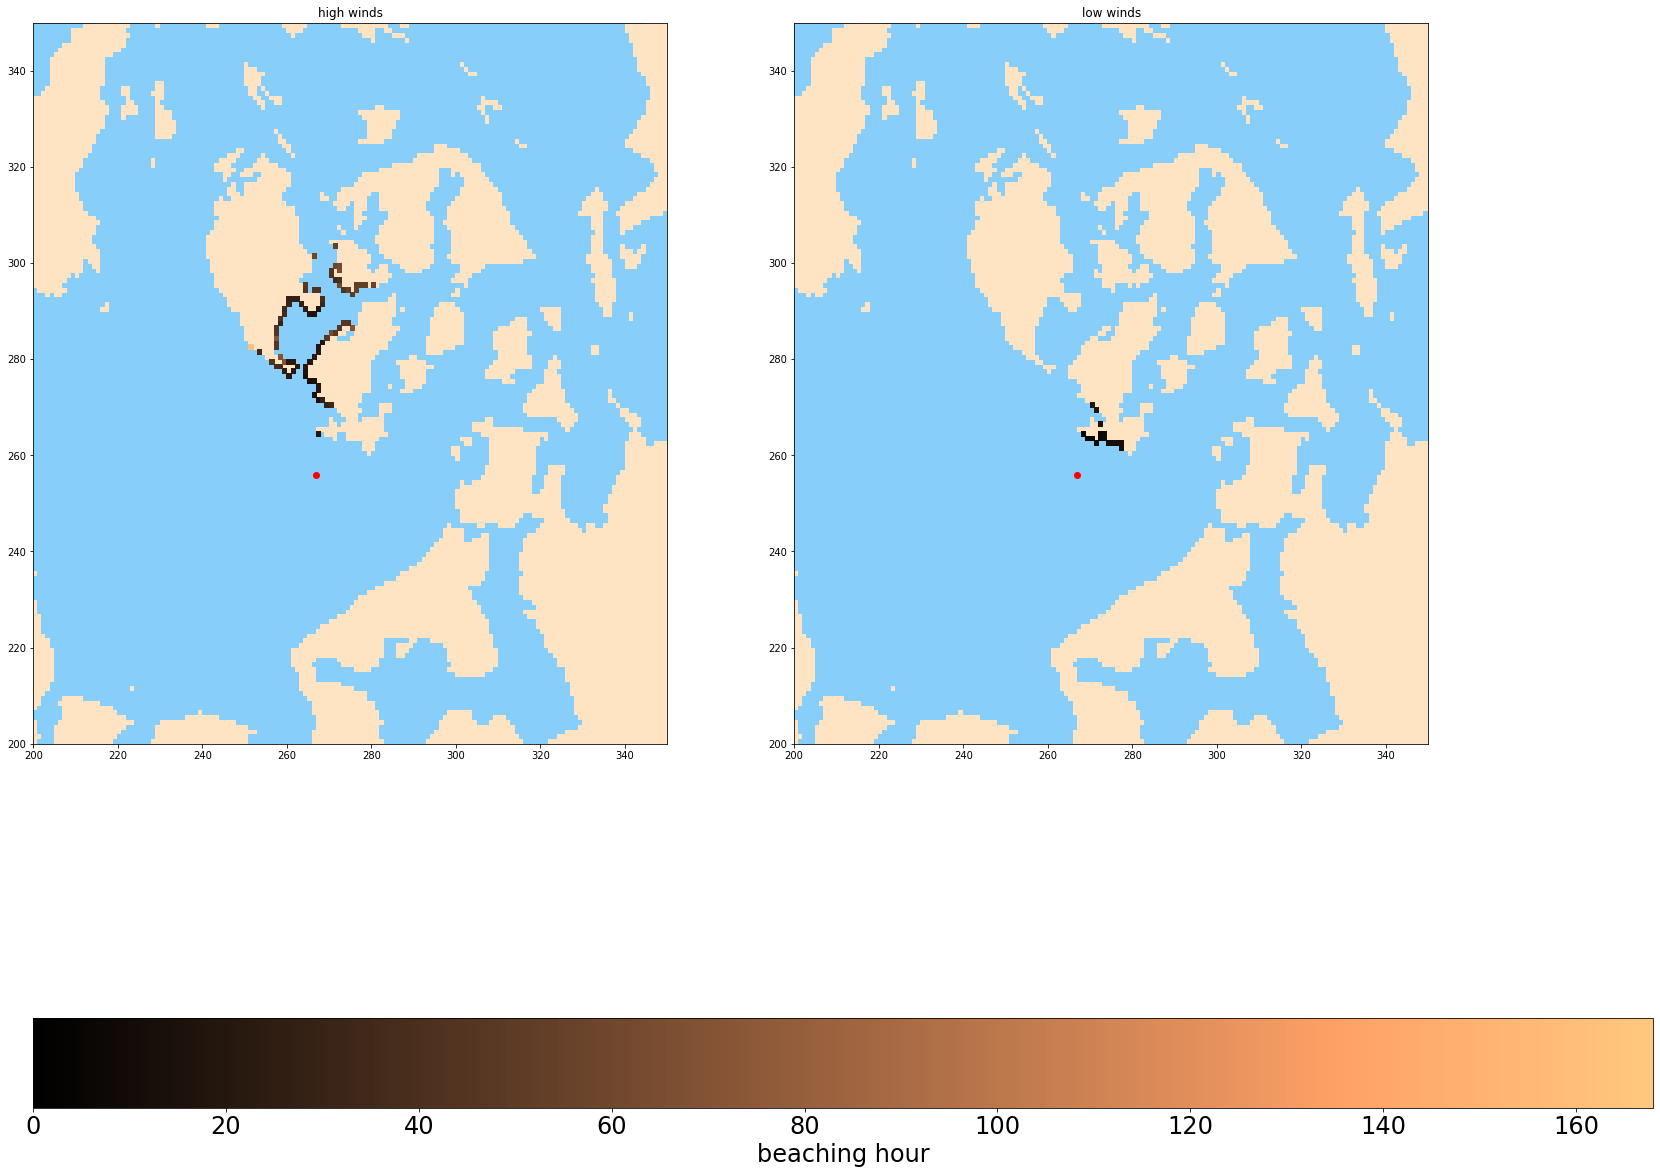

In [25]:
fig, ax = plt.subplots(1,2, figsize = (25,25))
for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("high winds")
ax[1].set_title("low winds")
ax[0].pcolormesh(np.ma.masked_equal(high150['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[1].pcolormesh(np.ma.masked_equal(low150['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
for a in ax:
    a.plot(267,256, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(200, 350)

p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.1, p1[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')
cbar.ax.tick_params(labelsize=24) 
cbar.set_label('beaching hour', fontsize = 24);

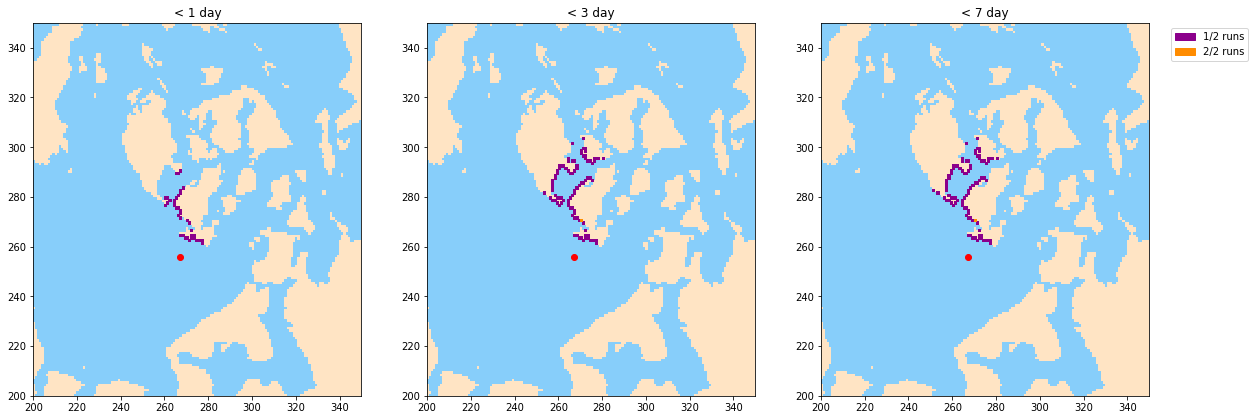

In [26]:
fig, ax = plt.subplots(1,3, figsize = (20,20))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, orange_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    a.plot(267,256, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(200, 350);